## Université de Bordeaux,  Master Mention Informatique

## Intelligence Artificielle

### Deep Learning, feuille 1

### Présentation

Le but de ce premier TD est de vous familiariser avec les réseaux de neurones et leur entraînement. Nous allons passer en revue les éléments de base suivant :

 - données d'apprentissage, 
 
 - fonction de perte (loss function)
 
 - descente de gradient
 
 Pour cela, nous allons utiliser un réseau de neurone (composé d'un seul neurone en fait) pour deux tâches : 
 
  - une régression linéaire simple
  
  - une classification binaire.

Commençons par importer quelques unes des bibliothèques usuelles :

In [92]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### On génère les données 

Afin de réaliser une régression linéaire simple, nous allongs générer un nuage de points. Exécutez le code de la cellule suivante :

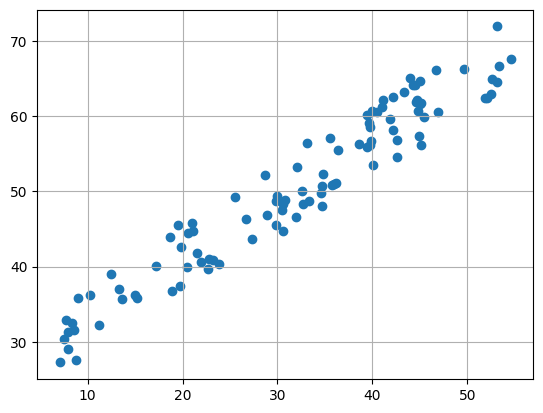

In [93]:
#Data: 
def generate(m, sizeNoise, slope, intersect):    
    x = [rd.random()*50 + 5 for i in range(m)]
    noise = [rd.random() * sizeNoise for i in range(m)]#np.rand(m,1) * sizeNoise
    y = [intersect + slope*x[i] + noise[i] for i in range(m)] 
    return np.array([x]), np.array([y])

m = 100
sizeNoise = 10
a = 0.8
b =  20
    
X, Y = generate(m, sizeNoise, a, b)
plt.grid()
plt.scatter(X, Y)

### Exercice 1. Un neurone :

Comme vu en cours, un neurone formel est représenté comme suit : 

![Un neurone formel (Mc Culloch & Pitts (1943))](img/formal_neuron_s.png)

1. Nommez chacun des élements du neurone.

2. Ecrivez une fonction <code>neuron(x, w, b, f)</code> permettant d'implémenter ce neurone.

In [94]:
def neuron(x, w, b, f):
    z = np.matmul(w, x) + b
    y = f(z)
    return y

3. Définissez deux fonctions <code>id</code> et <code>sigmoid</code> définies par :
$$
id(z) = z \text{ et } sigmoid(z) = \frac{1}{1+ e^{-z}}.
$$

In [95]:
def id(z):
    return z

def sigmoid(z):
    return 1. / (1 + np.exp(z))

4. Testez vos fonctions. L'exécution de la cellule suivante devrait donner le résultat affiché.

In [96]:
x = np.array([1])
w = np.array([1])
b = [1]

y_hat = neuron(x, w, b, id)
print('x: ', x)
print('y_hat: ', y_hat)

x:  [1]
y_hat:  [2]


### Exercice 2. Régression linéaire : 

Dans cet exercice, nous allons entraîner un neurone pour réaliser une régression linéaire simple. 

1. Dessiner le neurone qui sera utilisé. Identifiez bien les paramètres à trouver.

Il suffit de prendre $p=1$ et $f=id$ dans le neurone formel de la figure ci-dessus. 

Les paramètres à trouver sont $w$ et $b$. Ils correspondent respectivement à $\beta_1$ et $\beta_0$ dans l'expression de la régression linéaire simple (voir votre cours de ACID). 

2. Ecrivez le code de la fonction <code>loss(y, y_hat)</code> définie comme la moyenne des carrés des écarts : 

$$
loss\left(y, \hat{y}\right) = \frac 1 {2} \sum_{i=1}^n \left(\hat{y_i} - y_i)\right)^2. 
$$

In [97]:
def loss(y, y_hat):
    return 1. / 2 * np.mean(y_hat)

3. Calculez le gradient de la fonction ${\cal L} = loss$ par rapport aux deux variables $w$ et $b$.

4. Ecrivez la focntion <code>gradient(x, y_hat, y)</code> retournant le gradient de la fonction $\cal L$.

In [98]:
def gradient(x, y_hat, y):
    dw = np.mean((y_hat - y)*x)
    db = np.mean((y_hat - y))
    return dw, db

5. Ecrivez une fonction <code>train(x, y, eta, epochs)</code> qui réalise une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

In [99]:
def train(x, y, eta, epochs):
    w = np.array([rd.random()])
    b = np.array([0])

    for epoch in range(epochs):

        y_hat = neuron(x, w, b, id)
        
        dw, db = gradient(x, y_hat, y)

        w = w - eta * dw
        w = w - eta * db

        l = loss(y, y_hat)
        
        if epoch%999==0:
            print('epoch: {}, loss: {:2.2%}'.format(epochs, l))

    return w, b

6. Entraînez votre neurone. Prenez $0.001$ comme valeur pour le pas d'apprentissage, et $10000$ pour le nombre d'epochs.

In [100]:
eta = 0.001
epochs = 10000
train(X, Y, eta, epochs)

epoch: 10000, loss: 805.62%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%
epoch: 10000, loss: 2345.51%


(array([1.46665896]), array([0]))

7. Donnez l'équation de la droite de régression obtenue. Ecrivez l'instruction permettant de calculer les valeurs prédites.

In [101]:
y_pred = w[0] * X * b[0]

8. Dessinez la droite de régression sur la même figure que le nuage de point.

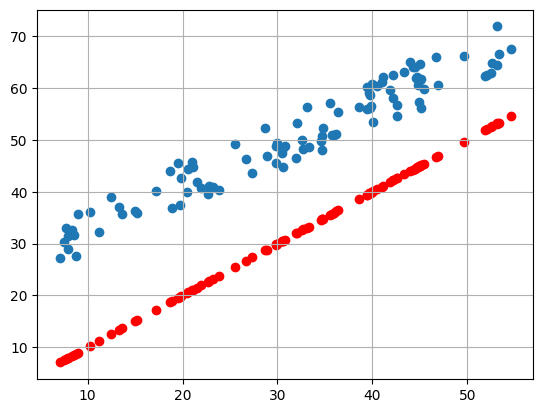

In [102]:
plt.grid()
plt.scatter(X, Y)
plt.scatter(X[0], y_pred[0], c='red')

9. Comparez le résultat obtenu avec la droite donnée par <code>linregress</code> du sous module <code>stats</code> du module <code>scipy</code>.

### Exercice 3. Régression logistique :

Dans cet exercice, nous allons transformer le neurone afin de l'utiliser pour réaliser une classification. Nous allons nous limiter à une classification bianire : les élements appartiennent soit à une classe 0 soit à une classe 1.  

1. Comment devons-nous appeler la "fonction" <code>neuron</code> pour que le fonction d'activation soit la sigmoid ?

In [103]:
x = np.array([[1,2,3]])
w = np.array([1])
b = np.array([1])
y_hat = neuron(x, w, b, sigmoid)
y_hat

array([0.11920292, 0.04742587, 0.01798621])

2. Exécutez la cellule suivante pour générer les données, les découper en deux parties train et test, etc. Observez le résultat de la cellule.

In [104]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=1, n_classes=2, 
                           n_informative=1, n_redundant=0, n_repeated=0,
                          n_clusters_per_class=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(y_train.shape)
print(np.unique(y))

(750, 1)
(750,)
[0 1]


3. Définissez la nouvelle fonction de perte. Nous allons utiliser la fonction *cross_entropy* vue en cours :

$$
\cal L = -\frac 1 n \sum_{i=1} y_i\times \log\left(\hat{y}_i\right) 
$$

In [105]:
def loss_crossentropy(y, y_hat):
    return - np.mean(y * np.log(y_hat))

4. Ecrivez les expressions mathématiques de ce que calcule votre neurone.

5. Calculez le gradient de $\cal L$ et écrivez la fonction correspondante

In [106]:
def gradient_crossentropy(x, y_hat, y):
    dw = - np.mean(y*(1-y_hat)*x)
    db = - np.mean(y*(1-y_hat))
    return dw, db

6. Adaptez une fonction <code>train(x, y, nu, epochs)</code> pour réaliser une déscente du gradient de la fonction $\cal L$ afin de trouver les paramètres $w$ et $b$ minimisant la valeur de $\cal L$. 

In [107]:
def train_corssentropy(x, y, eta, epochs):
    w = np.array([rd.random()])
    b = np.array([0])

    for epoch in range(epochs):

        y_hat = neuron(x, w, b, sigmoid)
        
        dw, db = gradient_crossentropy(x, y_hat, y)

        w = w - eta * dw
        w = w - eta * db

        l = loss_crossentropy(y, y_hat)
        
        if epoch%999==0:
            print('epoch: {}, loss: {:2.2%}'.format(epoch, l))

    return w, b

7. Exécutez la cellule suivante pour que vos calculs matriciels puissent se faire et entraînez votre neurone.

In [108]:
X_train = np.reshape(X_train, (X_train.shape[1], X_train.shape[0]))
print(X_train.shape)
print(y_train.shape)

(1, 750)
(750,)


In [109]:
eta = 0.001
epochs = 10000
w, b = train_corssentropy(X_train, y_train, eta, epochs)

epoch: 0, loss: 52.79%
epoch: 999, loss: 85.89%
epoch: 1998, loss: 129.31%
epoch: 2997, loss: 177.65%
epoch: 3996, loss: 228.27%
epoch: 4995, loss: 280.03%
epoch: 5994, loss: 332.40%
epoch: 6993, loss: 385.12%
epoch: 7992, loss: 438.06%
epoch: 8991, loss: 491.14%
epoch: 9990, loss: 544.32%


8. Evaluez votre modèle. Pour cela : 

8.1. Exécutez la cellule suivante pour formater les données de test.

In [ ]:
X_test = np.reshape(X_test, (X_test.shape[1], X_test.shape[0]))

8.2. Appliquez votre neurone aux données de test et observez le résultat obtenu.

8.3. Transformez les sorties en 0 et 1 : 

In [110]:
y_pred = [1 if y > 0.5 else 0 for y in y_pred]

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

8.4. Evaluez la qualité du modèle obtenu 